# Random Forest :
**Problem Statement :**
- Use Random Forest to prepare a model on fraud data. 
- Treating those who have taxable_income <= 30000 as "Risky" and others are "Good".


In [39]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pydotplus
from sklearn import preprocessing, datasets, tree, externals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO

# Ignore anoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Impordtin the dataset
df = pd.read_csv("Fraud_check.csv")

# Showing first 5 rows from dataset
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Total rows & columns in dataset
df.shape

(600, 6)

In [4]:
# Looking for null values
df.isnull().any().any()

False

In [5]:
# Imformation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# Checking additional stats from dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [7]:
# Correlation between each columns
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.0000,-0.0644,-0.0018
City.Population,-0.0644,1.0000,0.0131
Work.Experience,-0.0018,0.0131,1.0000


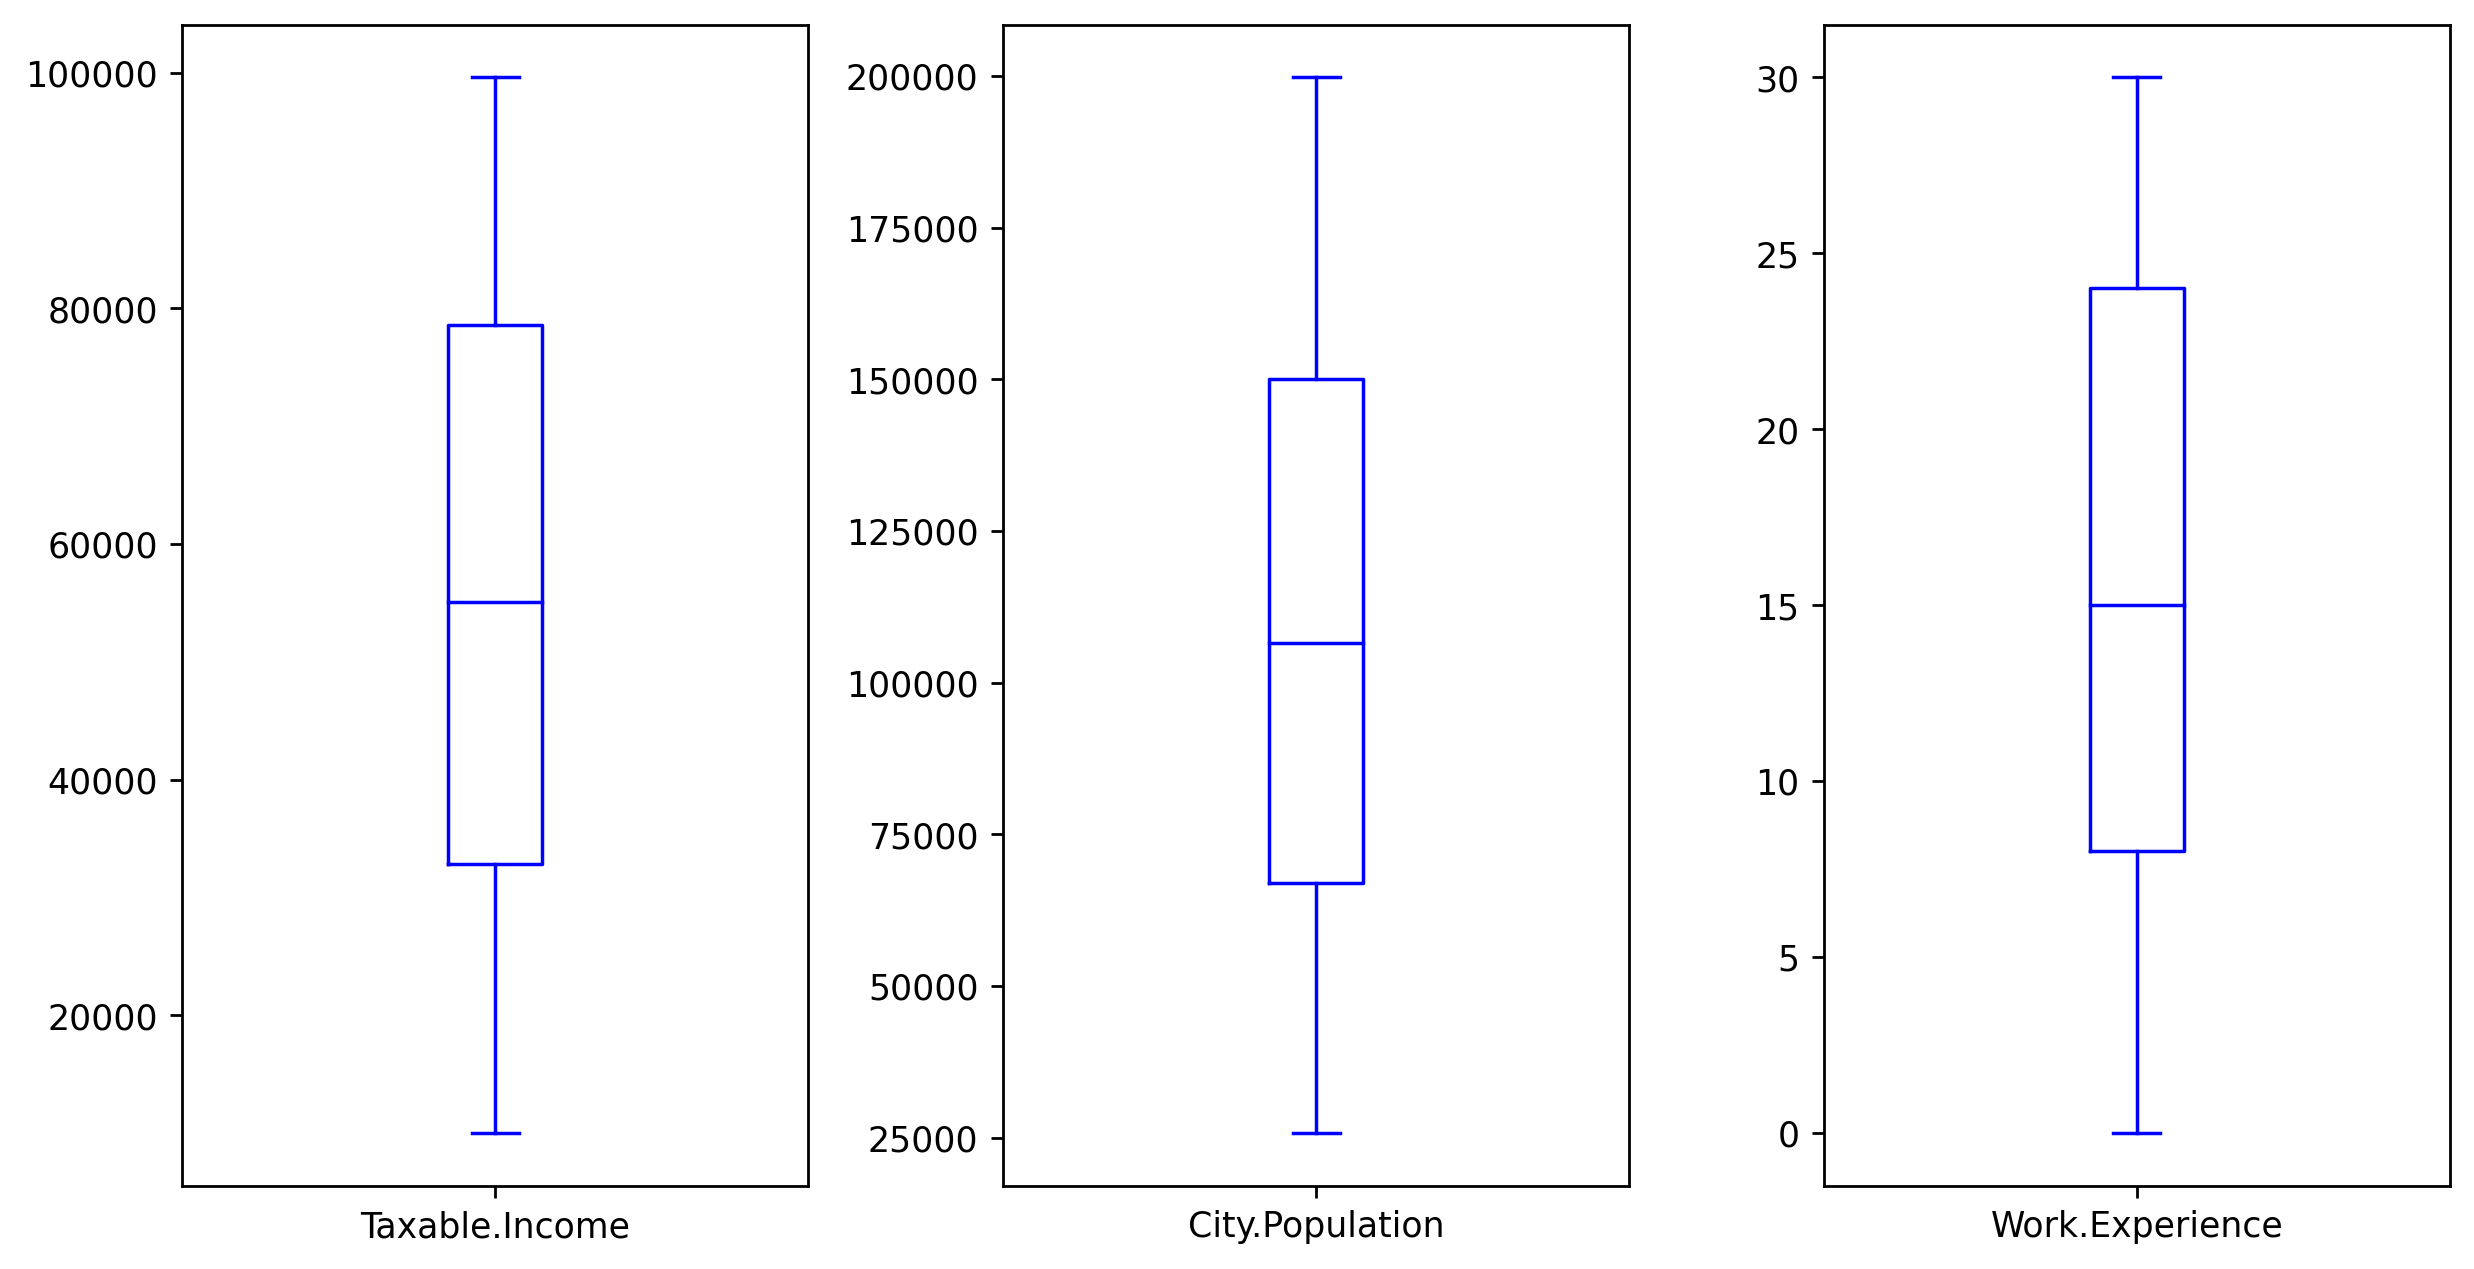

In [8]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots
plt.rcParams['figure.dpi']=250
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

In [9]:
# Skewnees of dataset
df.skew()

Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


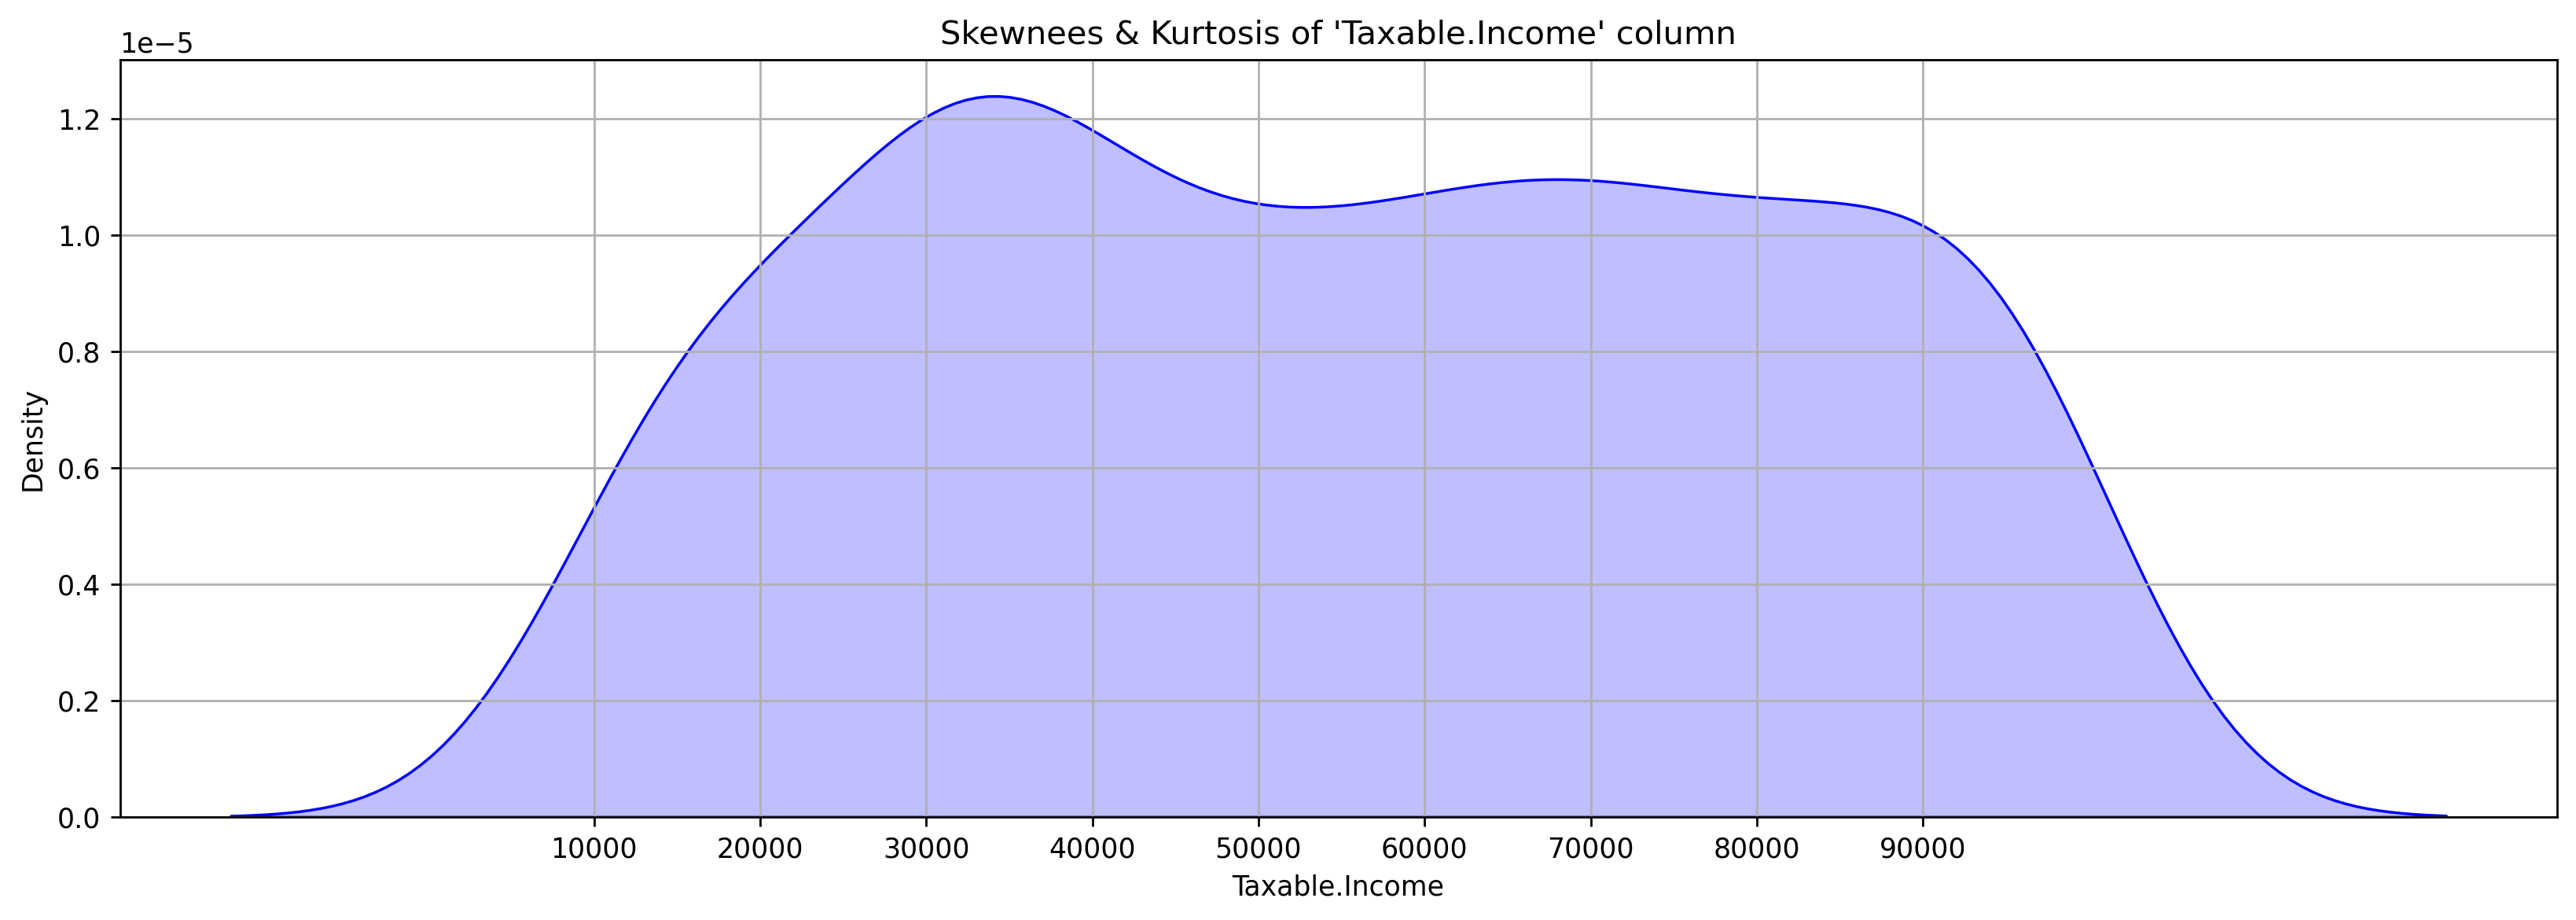

In [10]:
# Visualizing skewnees of "Taxable.Income" column
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='blue')
plt.xticks([i for i in range(10000,100000,10000)])
plt.title("Skewnees & Kurtosis of 'Taxable.Income' column")
plt.grid()
plt.show()

**Ordinal Encoding :**
- Converting categorical columns into numerical columns.

In [11]:
oe = OrdinalEncoder()
cat_cols = df.select_dtypes(object).columns
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


<AxesSubplot: >

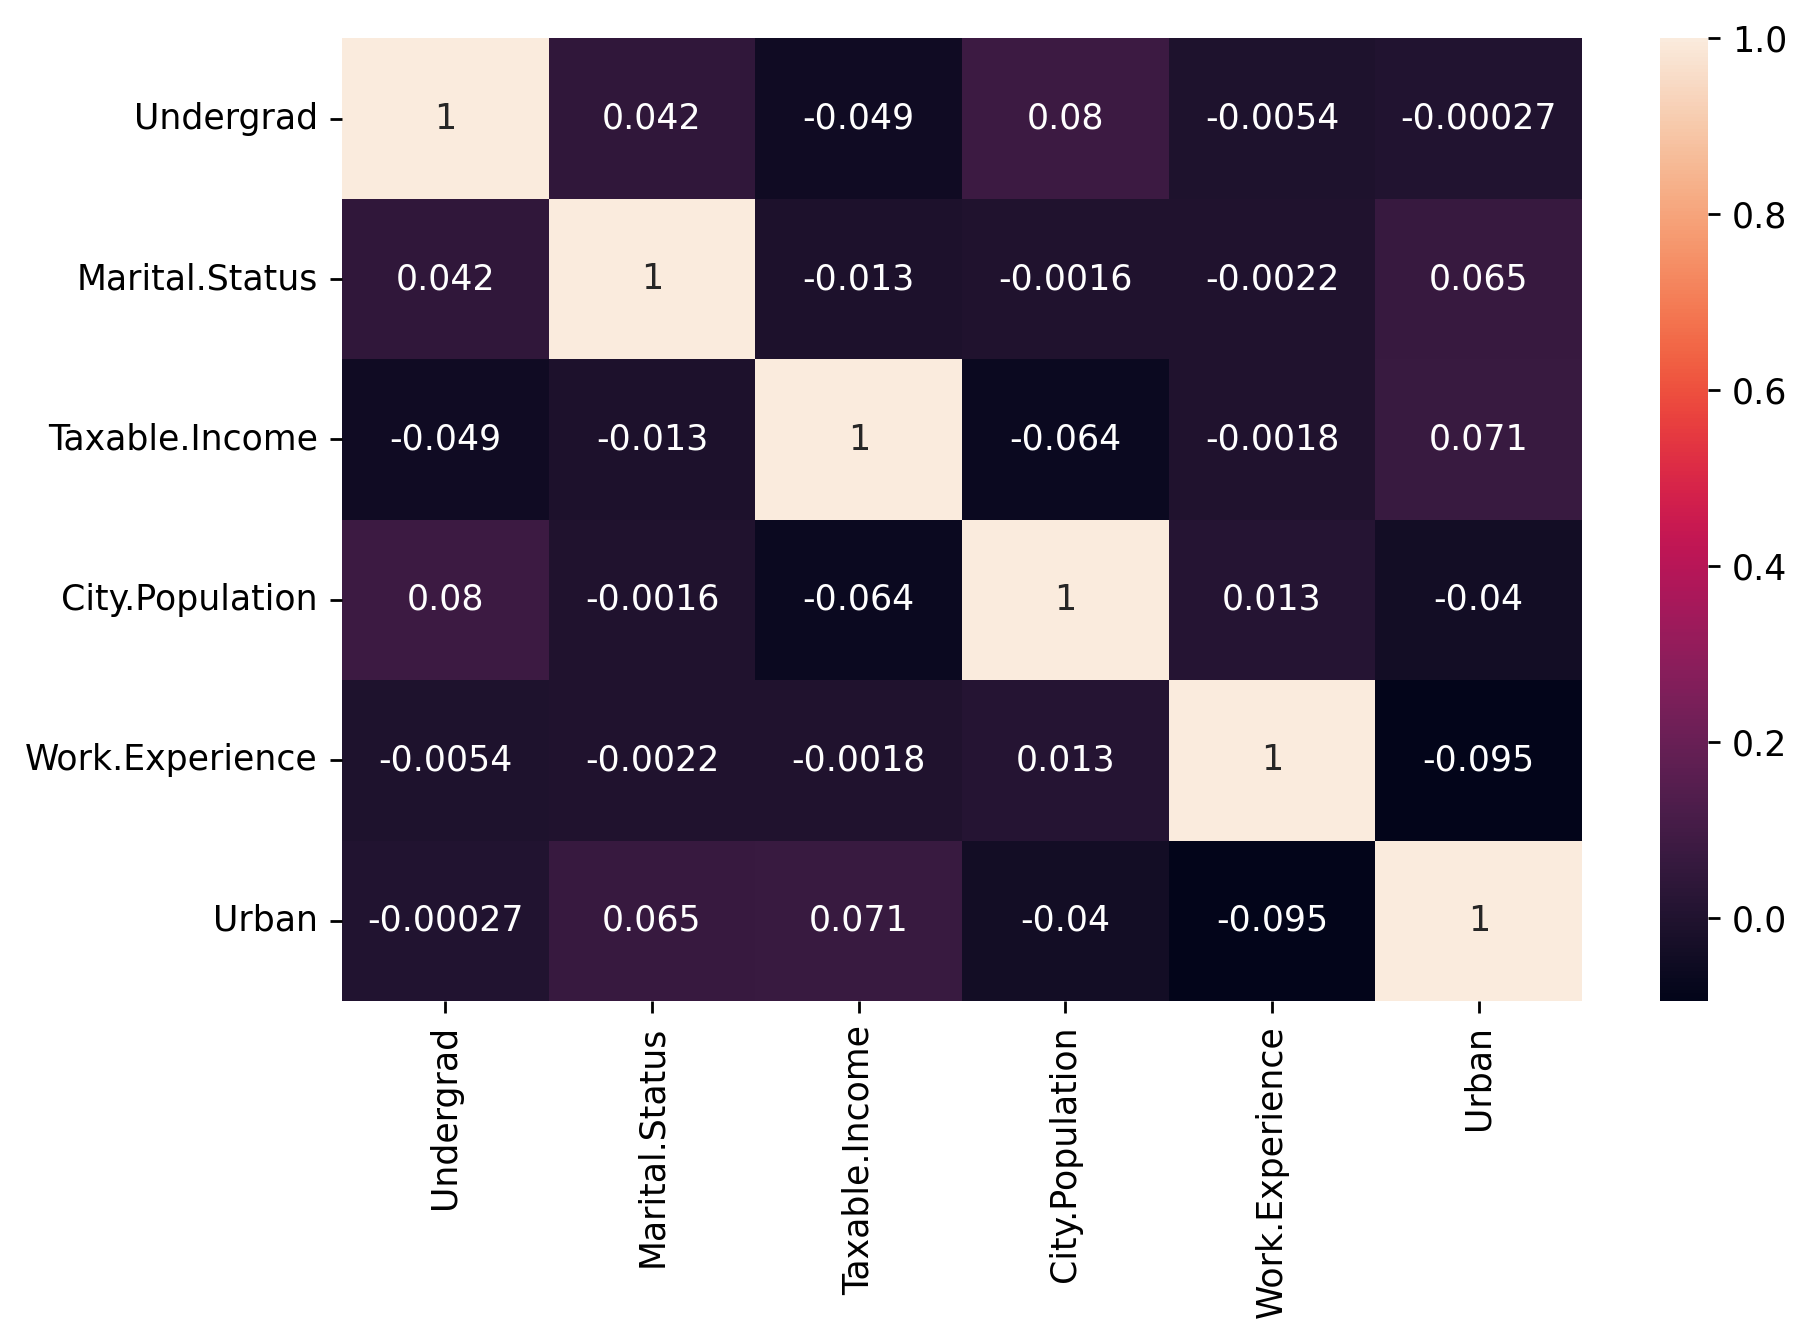

In [12]:
# Correlation between each columns
plt.rcParams['figure.figsize'] = (8,5)
corr=df.corr()
sns.heatmap(data=corr,annot=True)

***Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"***

In [13]:
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins=[0,30000,100000], labels=['Risky','Good'])

df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [14]:
list(df.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [15]:
# Creating independent & dependent variables
x = df.drop(columns=['Taxable.Income'])
y = df['Taxable.Income']

In [16]:
# Splitting dataset into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# Checking how much data going into training & testing sets
print("Training Set :",xtrain.shape)
print("Training Set :",ytrain.shape)
print("Testing Set :",xtest.shape)
print("Testing Set :",xtest.shape)

Training Set : (480, 5)
Training Set : (480,)
Testing Set : (120, 5)
Testing Set : (120, 5)


In [17]:
ytrain.value_counts()

Good     379
Risky    101
Name: Taxable.Income, dtype: int64

In [18]:
# Building a model
model = RandomForestClassifier(n_estimators=150, n_jobs=4, oob_score=True, criterion='entropy')
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print('Generalization Score :',model.oob_score_)
print("Train Accuracy : ",model.score(xtrain,ytrain))
print("Test Accuracy : ",model.score(xtest,ytest))
print("Classification Report :")
print(classification_report(ytest,ypred))

Generalization Score : 0.75
Train Accuracy :  1.0
Test Accuracy :  0.7666666666666667
Classification Report :
              precision    recall  f1-score   support

        Good       0.80      0.95      0.87        97
       Risky       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120



In [19]:
# Training accuracy
pred_train = model.predict(xtrain)
print("Train Accuracy :",accuracy_score(ytrain,pred_train))
confusion_matrix(ytrain,pred_train)

Train Accuracy : 1.0


array([[379,   0],
       [  0, 101]], dtype=int64)

In [20]:
# Testing accuracy
pred_test = model.predict(xtest)
print("Test Accuracy :",accuracy_score(ytest,pred_test))
confusion_matrix(ytest,pred_test)

Test Accuracy : 0.7666666666666667


array([[92,  5],
       [23,  0]], dtype=int64)

In [21]:
# Creating dataframe for actual & predicted values
df_t=pd.DataFrame({'Actual':ytest, 'Predicted':pred_test})
df_t

,Actual,Predicted
446,Risky,Good
404,Good,Good
509,Risky,Good
455,Good,Good
201,Good,Good
...,...,...
5,Good,Good
224,Good,Good
159,Good,Good
38,Risky,Good


In [22]:
print("Actual values :")
df_t['Actual'].value_counts()

Actual values :


Good     97
Risky    23
Name: Actual, dtype: int64

In [23]:
print("Predicted values :")
df_t['Predicted'].value_counts()

Predicted values :


Good     115
Risky      5
Name: Predicted, dtype: int64

In [27]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,Good,50047,10,1.0
1,1.0,0.0,Good,134075,18,1.0
2,0.0,1.0,Good,160205,30,1.0
3,1.0,2.0,Good,193264,15,1.0
4,0.0,1.0,Good,27533,28,0.0


In [24]:
cols = list(df.columns)
predict = df.drop(columns=['Taxable.Income'])
target = df['Taxable.Income']

In [25]:
tree1 = model.estimators_[20]
tree1

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1472483442)

In [28]:
dot_data = StringIO()

export_graphviz(tree1, out_file=dot_data, class_names=target, filled=True, rounded=True,
                impurity=False, proportion=False, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [29]:
graph.write_png('fraud_full.png')

True

**Conclusion :**
- The accuracy of training set are 100% , so we test the accuracy on testing set which is 76%.


In [30]:
RF_small = RandomForestClassifier(n_estimators=10, max_depth=3)
RF_small.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [33]:
tree_small = RF_small.estimators_[5]
export_graphviz(tree_small, out_file = dot_data, rounded = True, precision = 1)
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_small.png')

True

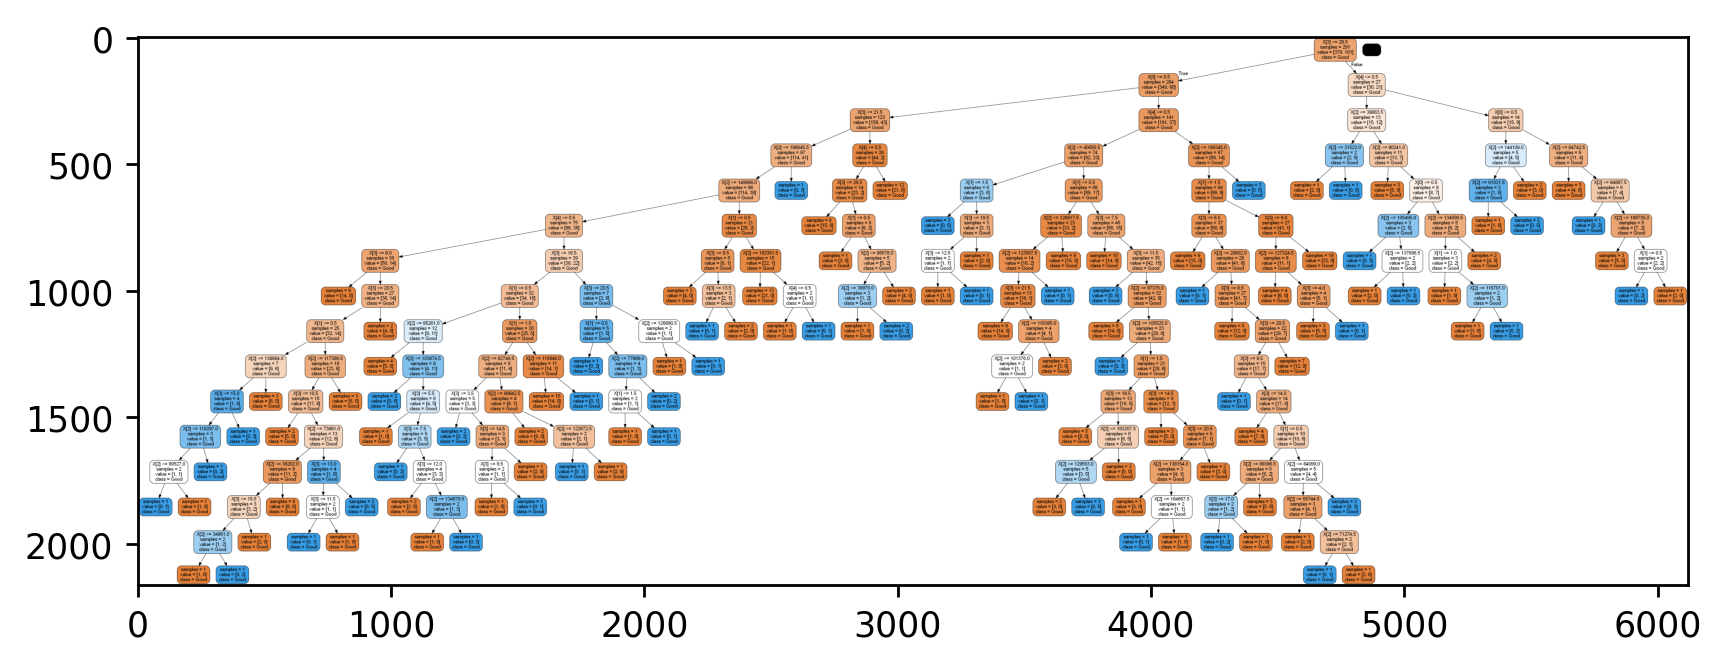

In [34]:
img = mpimg.imread('fraud_small.png') 
plt.imshow(img)

In [35]:
model.feature_importances_

array([0.03521763, 0.06778604, 0.52630061, 0.33590275, 0.03479297])

In [38]:
feature_imp = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_imp

,feature,importance
2,City.Population,0.526301
3,Work.Experience,0.335903
1,Marital.Status,0.067786
0,Undergrad,0.035218
4,Urban,0.034793


# As we seen above table "City.Population" feature is the most important feature in the dataset.